In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame, read_feather

In [2]:
#train_df = read_csv('train1M.csv', parse_dates=["pickup_datetime"],
#                    infer_datetime_format=True, usecols=cols)
df = read_feather('tmp/train100K.feather')
print(df.shape)
df.head()
#train_df.describe()

(100000, 7)


fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
0         10.5 2015-05-11 11:42:51        -73.978989        40.761620   
1          7.5 2013-10-20 13:27:00        -73.980347        40.763069   
2          4.5 2012-08-04 22:25:00        -74.002281        40.726578   
3         14.5 2011-10-22 23:12:35        -73.932800        40.758900   
4         13.0 2013-11-06 12:44:10        -73.975418        40.761070   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.963959         40.770561                1  
1         -73.988686         40.753979                2  
2         -74.009583         40.723598                2  
3         -73.995003         40.736599                1  
4         -73.998444         40.724892                1

In [3]:

#jfk = (-73.7822222222, 40.6441666667)

# define bounding box
BB = (-75, -73, 40, 41.5)

# load image of NYC map
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-75_40_-73_41.5.png')

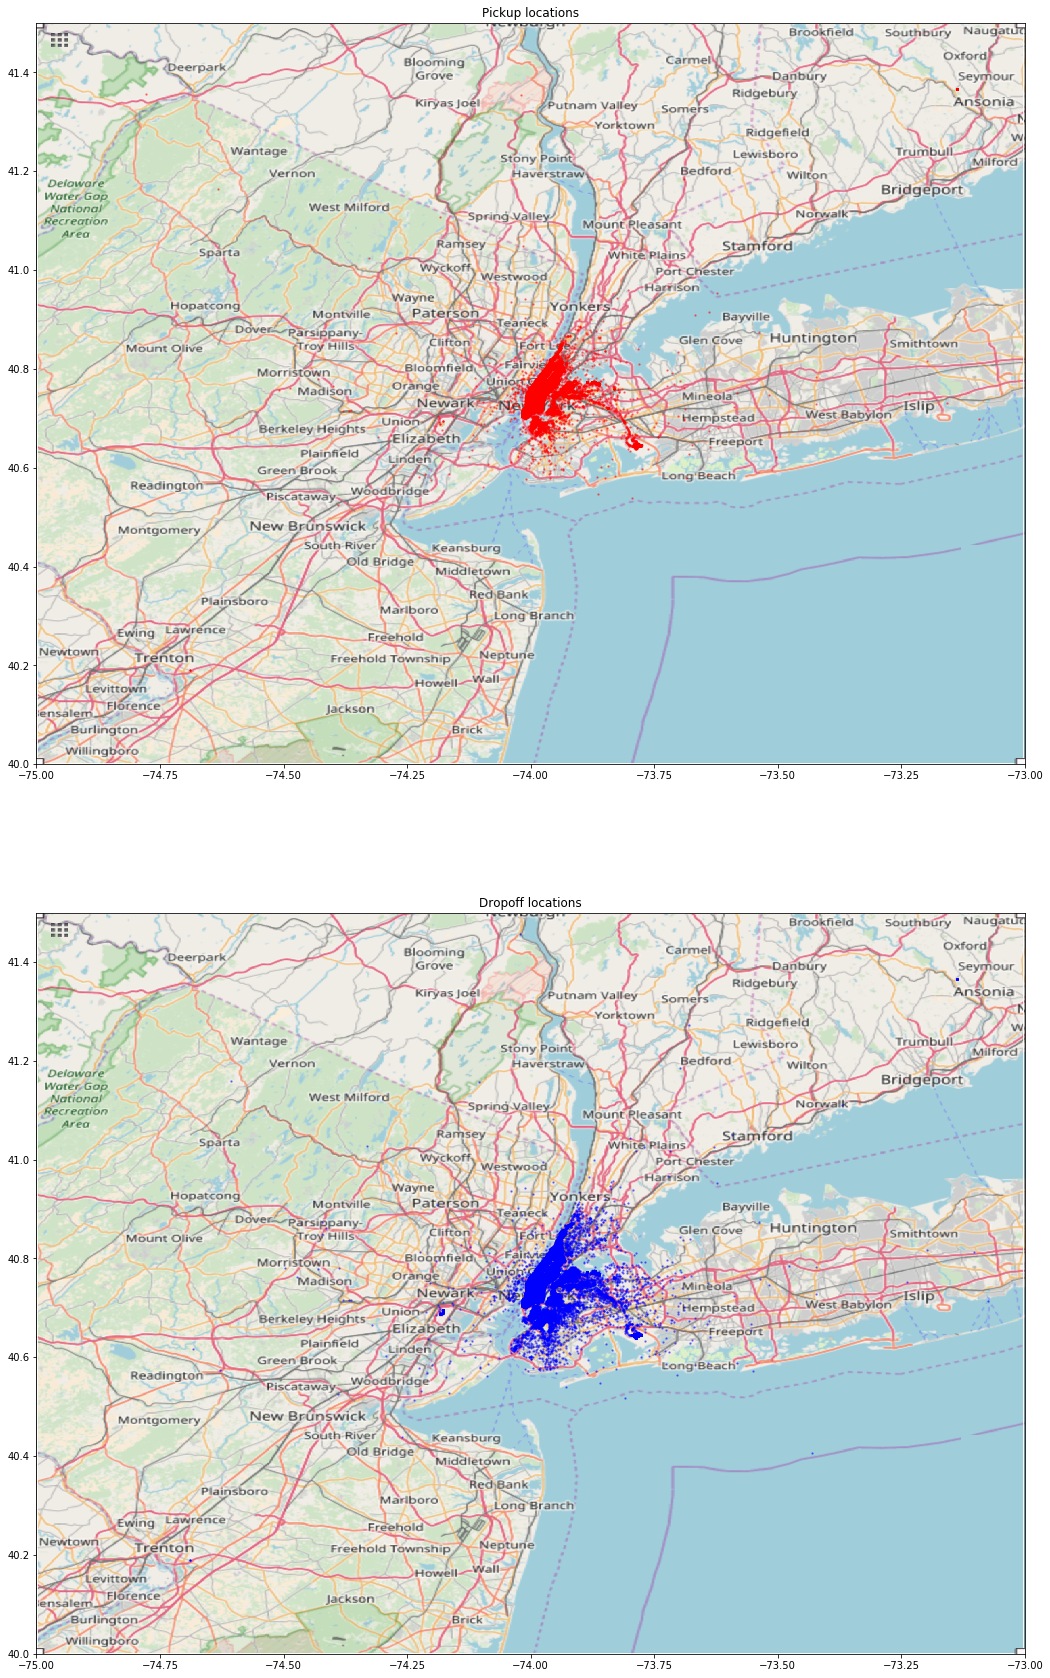

In [4]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, figsize=(30, 30)):
    fig, axs = plt.subplots(2,1, figsize=figsize)
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=0.4, c='r', s=2)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=[-75, -73, 40, 41.5]);

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=0.4, c='b', s=2)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=[-75, -73, 40, 41.5]);
    
plot_on_map(df, BB, nyc_map)

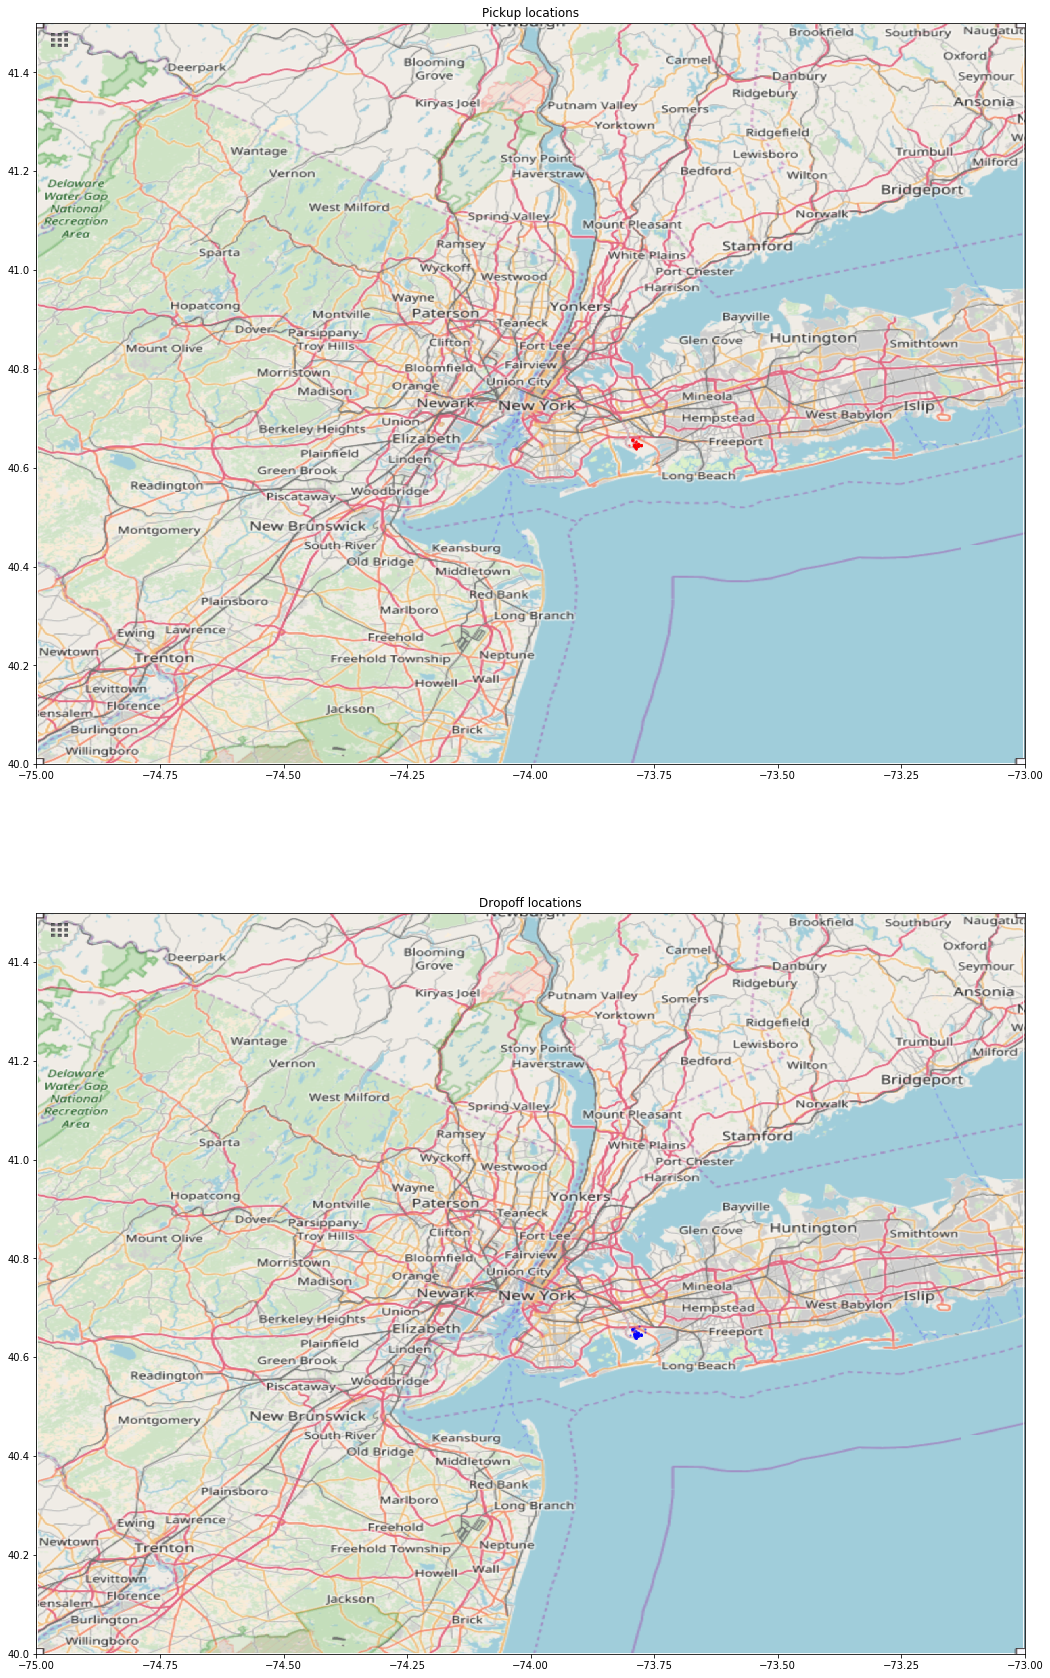

In [5]:
#jfk = (-73.7822222222, 40.6441666667)

# Removing observations with erroneous values
mask = df['pickup_longitude'].between(-73.802, -73.762)
mask &= df['dropoff_longitude'].between(-73.802, -73.762)
mask &= df['pickup_latitude'].between(40.624, 40.664)
mask &= df['dropoff_latitude'].between(40.624, 40.664)

jfk = df[mask]
plot_on_map(jfk, BB, nyc_map)

In [6]:
jfk.shape

(100, 7)

In [7]:
df['jfk'] = np.where(mask==True, 1, 0)

In [8]:
df.head()

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
0         10.5 2015-05-11 11:42:51        -73.978989        40.761620   
1          7.5 2013-10-20 13:27:00        -73.980347        40.763069   
2          4.5 2012-08-04 22:25:00        -74.002281        40.726578   
3         14.5 2011-10-22 23:12:35        -73.932800        40.758900   
4         13.0 2013-11-06 12:44:10        -73.975418        40.761070   

   dropoff_longitude  dropoff_latitude  passenger_count  jfk  
0         -73.963959         40.770561                1    0  
1         -73.988686         40.753979                2    0  
2         -74.009583         40.723598                2    0  
3         -73.995003         40.736599                1    0  
4         -73.998444         40.724892                1    0

In [9]:
df.groupby('jfk').size()

jfk
0    99900
1      100
dtype: int64

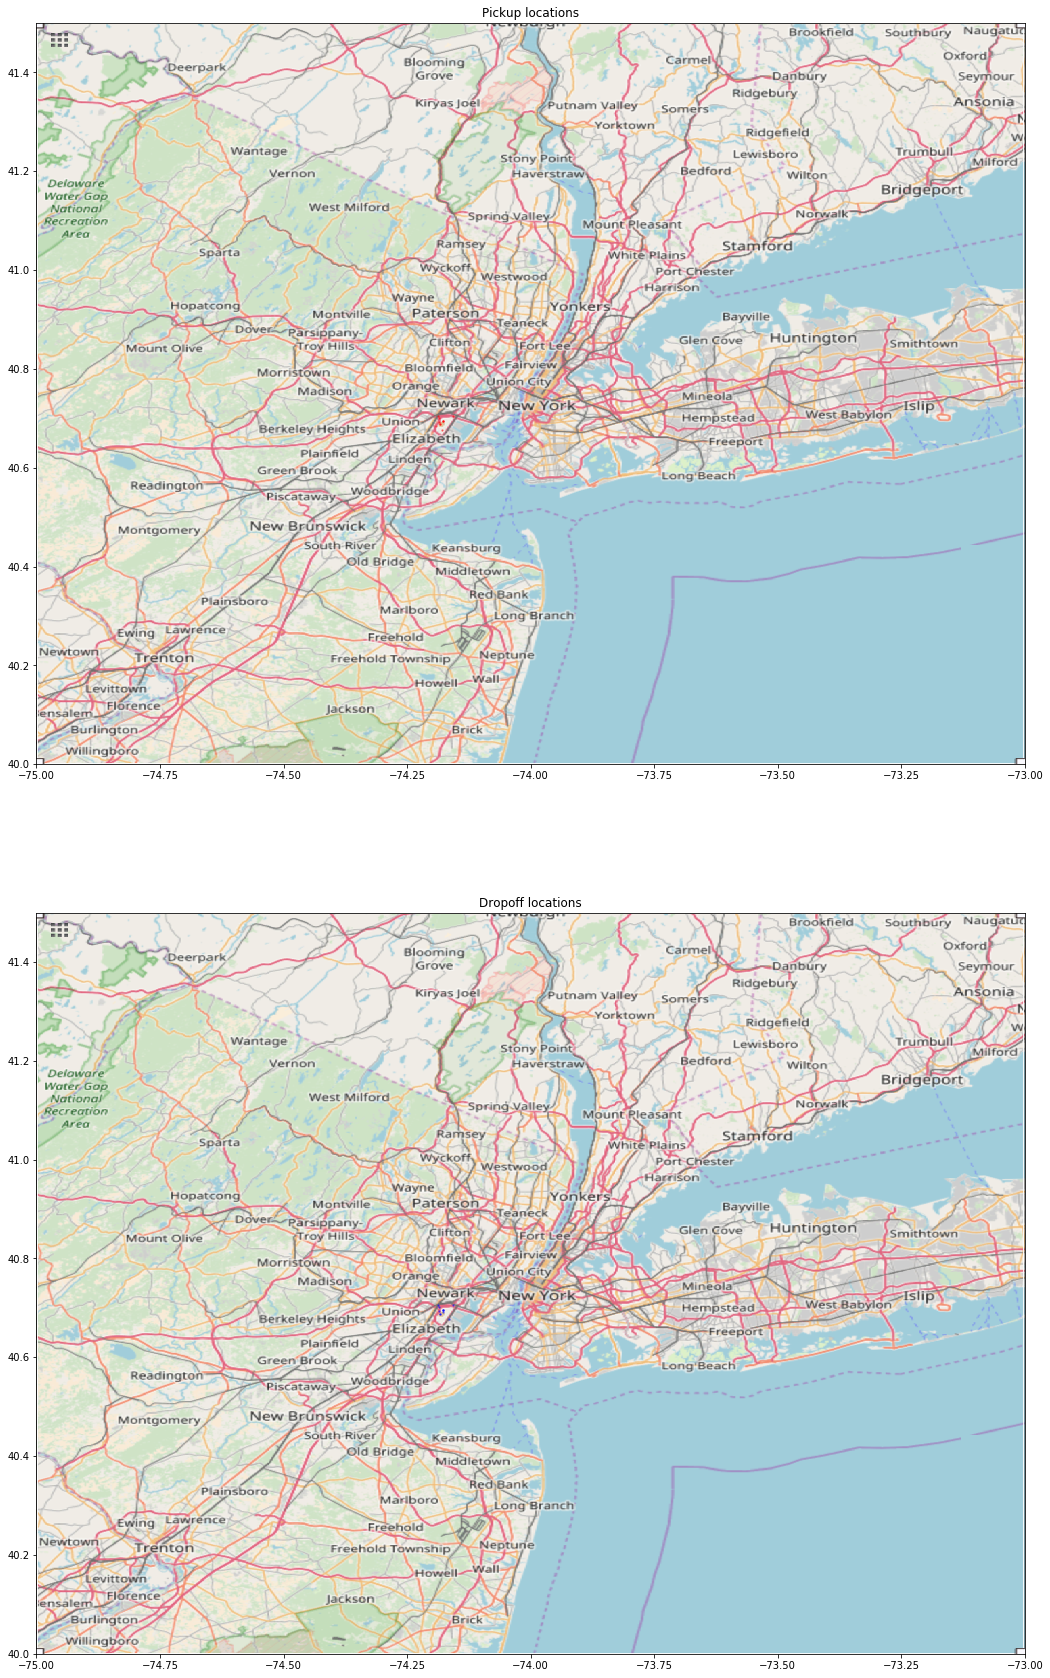

In [10]:
# ewr = (-74.175, 40.69)

# Removing observations with erroneous values
mask = df['pickup_longitude'].between(-74.195, -74.155)
mask &= df['dropoff_longitude'].between(-74.195, -74.155)
mask &= df['pickup_latitude'].between(40.67, 40.71)
mask &= df['dropoff_latitude'].between(40.67, 40.71)

ewr = df[mask]
plot_on_map(ewr, BB, nyc_map)

In [12]:
df['ewr'] = np.where(mask==True, 1, 0)
df.groupby('ewr').size()

ewr
0    99989
1       11
dtype: int64